In [40]:
%%HTML
<style>
    body {
        --vscode-font-family: "Josefin Sans, sans-serif";
    }
</style>

# Titanic - Data Cleaning and Analysis

### Project Objective
- Load, inspect, and understand a real-world dataset. 
- Identify and handle missing values and inconsistencies. 
- Perform basic data cleaning and feature engineering. 
- Conduct exploratory data analysis (EDA) with visualizations. 
- Build a simple model to demonstrate how the cleaned data can be used for prediction

#### import Libraries

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
custom_palette = {'male': '#4E79A7', 'female': '#FF6B6B'} 

#### Load the data

In [43]:
train_df = pd.read_csv("dataset/train.csv")

In [44]:
test_df = pd.read_csv("dataset/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
gender_submission_df = pd.read_csv("dataset/gender_submission.csv")
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### EDA

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train_df.shape

(891, 12)

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Statistical summary

In [49]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Data Cleaning

- Duplicates

In [51]:
print(f'Number of duplicated rows: {train_df.duplicated().sum(axis=0)}')

Number of duplicated rows: 0


- Missing values

In [52]:
missing_data = []
for column_name, null_rows in train_df.isnull().sum().items():
    if null_rows > 0:
        perc = null_rows / len(train_df) * 100
        missing_data.append([column_name, null_rows, perc])

missing_df = pd.DataFrame(missing_data, columns=["Column", "Missing Values", "Percentage"])

missing_df

,Column,Missing Values,Percentage
0,Age,177,19.865320
1,Cabin,687,77.104377
2,Embarked,2,0.224467


- Handling missing values with mean for Age (numeric) and mode for Embarked (categorical)

In [53]:
train_df = train_df.fillna(value = {"Age": train_df["Age"].mean(),
                                    "Embarked": train_df["Embarked"].mode()[0]})

- Drop column Cabin

In [54]:
train_df.drop(columns = ["Cabin"], inplace=True)

In [55]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Gender

In [57]:
total_male_passengers = np.sum(train_df.Sex == 'male')
total_female_passengers = np.sum(train_df.Sex == 'female')

print(f"Total male passengers : {total_male_passengers}")
print(f"Total female passengers : {total_female_passengers}")

Total male passengers : 577
Total female passengers : 314


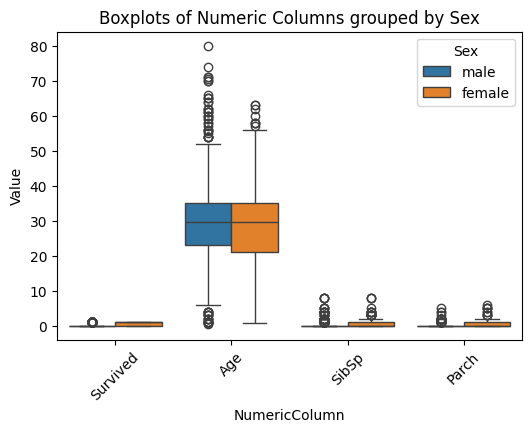

In [58]:
cat_col = "Sex"

exclude_cols = ["PassengerId", "Pclass", "Fare"]
num_cols = [col for col in train_df.select_dtypes(include="number").columns if col not in exclude_cols]

melted_df = train_df.melt(id_vars=cat_col, value_vars=num_cols, var_name="NumericColumn", value_name="Value").dropna()

plt.figure(figsize=(6, 4))
sns.boxplot(x="NumericColumn", y="Value", hue=cat_col, data=melted_df)
plt.title(f"Boxplots of Numeric Columns grouped by {cat_col}")
plt.xticks(rotation=45)
plt.show()

- Gender percentage

In [59]:
gender_df = (train_df['Sex']
    .value_counts(normalize=True)
    .reset_index(name='Percentage')
)

gender_df.round(2)

,Sex,Percentage
0,male,0.65
1,female,0.35


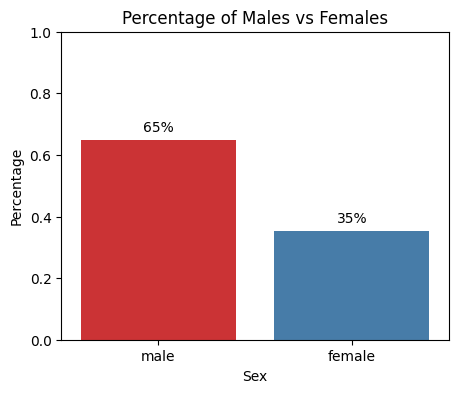

In [60]:
plt.figure(figsize=(5, 4))

ax = sns.barplot(data=gender_df, x='Sex', y='Percentage', hue ='Sex', palette="Set1")

for bar, percentage in zip(ax.patches, gender_df.Percentage):
    ax.text(
       x =  bar.get_x() + bar.get_width() / 2.0,
       y =  bar.get_height() + 0.02,
       s = f"{percentage:.0%}",
       ha='center', va='bottom'
    )

plt.title('Percentage of Males vs Females')
plt.ylim(0, 1)
plt.ylabel("Percentage")
plt.xlabel("Sex")
plt.show()

- Out of 891 total passengers
    - The majority of passengers were men 65% 
    - Female passengers were only 35%

- Survival rate by gender

In [61]:
def get_divisor_by_sex(row):
    return total_male_passengers if row['Sex'] == 'male' else total_female_passengers

In [62]:
survival_rate_by_gender = train_df.groupby(['Sex', 'Survived']).size()
survival_rate_by_gender = survival_rate_by_gender.reset_index(name='Count')
survival_rate_by_gender['Percentage'] = survival_rate_by_gender.apply(lambda row: np.round( row['Count'] / get_divisor_by_sex(row) * 100, 0), axis=1)

survival_rate_by_gender

,Sex,Survived,Count,Percentage
0,female,0,81,26.0
1,female,1,233,74.0
2,male,0,468,81.0
3,male,1,109,19.0


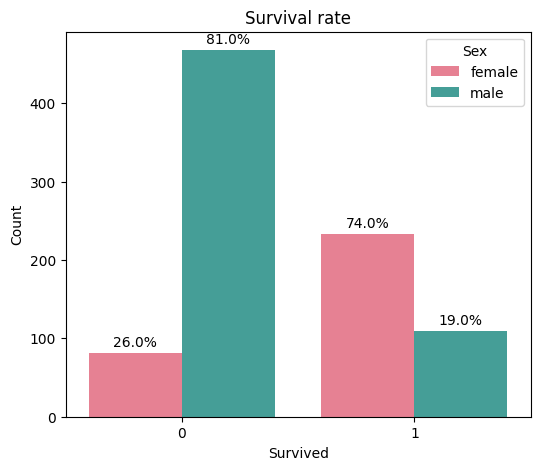

In [63]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(data=survival_rate_by_gender, x='Survived', y='Count', hue='Sex', palette="husl")

for bar, percent in zip(ax.patches, survival_rate_by_gender['Percentage']):
    ax.text(
        x = bar.get_x() + bar.get_width() / 2.,
        y = bar.get_height() + 5,
        s = f"{percent:.1f}%",  
        ha='center', va='bottom'
    )

plt.title('Survival rate')
# plt.ylim(0, 1)
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

- Men were 65% of total passengers and only 26% of men survived and 81% were dead
- Even though women were only 35% of the total passengers, 74% of women survived
- This is because women and children are prioritized during evacuation procedures in such events of ship sinking.

##### Passenger Class

In [64]:
total_passengers = train_df.shape[0]
passengers_by_class = (train_df.groupby("Pclass").size().reset_index(name="Total").assign(Percentage=lambda df: round(df["Total"] / len(train_df) * 100, 2)))

passengers_by_class

,Pclass,Total,Percentage
0,1,216,24.24
1,2,184,20.65
2,3,491,55.11


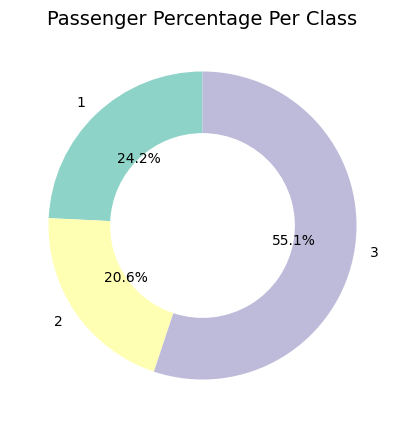

In [65]:
colors = sns.color_palette('Set3')

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    passengers_by_class['Percentage'],
    labels=passengers_by_class['Pclass'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.4}  
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title('Passenger Percentage Per Class', fontsize=14)
plt.show()

-
    - The vast majority of passengers were in the third class which is a low income class.
    - The remaining passengers were more or less equally distributed in the first and second class.

- Survival count by class

In [66]:
total_passengers = train_df.shape[0]

passengers_survival_by_class = train_df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

passengers_survival_by_class

,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


- Survival rate by class

In [67]:
total_per_class = passengers_survival_by_class.groupby('Pclass')['Count'].sum().reset_index(name='Total')

class_survival = passengers_survival_by_class.merge(total_per_class, on='Pclass')
class_survival['Percentage'] = np.round(class_survival['Count'] / class_survival['Total'] * 100, 2)

class_survival

,Pclass,Survived,Count,Total,Percentage
0,1,0,80,216,37.04
1,1,1,136,216,62.96
2,2,0,97,184,52.72
3,2,1,87,184,47.28
4,3,0,372,491,75.76
5,3,1,119,491,24.24


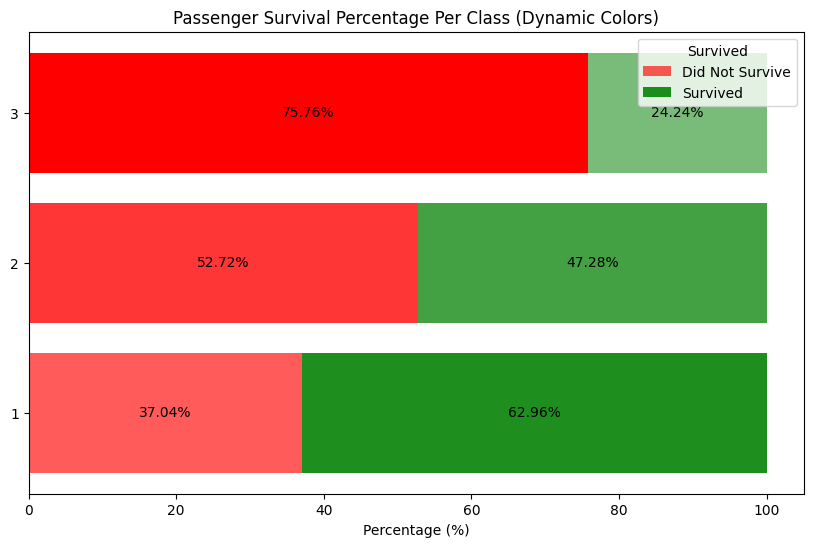

In [68]:
pivot_df = class_survival.pivot(index='Pclass', columns='Survived', values='Percentage').fillna(0)

figure, ax = plt.subplots(figsize=(10, 6))

max_val = pivot_df.values.max()

for i, pclass in enumerate(pivot_df.index):
    left = 0
    for survived in pivot_df.columns:
        width = pivot_df.loc[pclass, survived]
        
        if survived == 1:
            color = mcolors.to_rgba('green', alpha=0.3 + 0.7 * (width / max_val))  # darker = higher %
        else:
            color = mcolors.to_rgba('red', alpha=0.3 + 0.7 * (width / max_val))
        
        ax.barh(i, width, left=left, color=color)
        
        # Add text inside segment
        if width > 0:
            ax.text(
                x=left + width / 2,
                y=i,
                s=f'{width:.2f}%',
                ha='center',
                va='center',
                color='black'
            )
        left += width

ax.set_xlabel('Percentage (%)')
ax.set_yticks(range(len(pivot_df.index)))
ax.set_yticklabels(pivot_df.index)
ax.set_title('Passenger Survival Percentage Per Class (Dynamic Colors)')
ax.legend(['Did Not Survive', 'Survived'], title='Survived', loc='upper right')
plt.show()

- 76% of the passengers from third class died and only 24% survived.
- Second class passengers survival is almost equal with 53% survived, 47% did not.
- First class is the only class where a passenger had a higher chance of survival.
    - A passenger from the Titanic first class had a survival rate of 63%.
    - Only 37% of first class passengers died
    - This indicates that lifeboats might have been prioritized for the first class passengers over other classes

##### Parch (Passengers with parents or children)¶

In [69]:
parch_value_counts = (train_df.Parch.value_counts().reset_index(name='Total').assign(Percentage=lambda df: round(df["Total"] / len(train_df) * 100, 2)))

print(parch_value_counts, '\n')

print('-' * 35, '\n')

parch_survival = train_df.groupby(['Parch', 'Survived', 'Sex']).size().reset_index(name='Total')
print(parch_survival.head(8), '\n')


   Parch  Total  Percentage
0      0    678       76.09
1      1    118       13.24
2      2     80        8.98
3      5      5        0.56
4      3      5        0.56
5      4      4        0.45
6      6      1        0.11 

----------------------------------- 

   Parch  Survived     Sex  Total
0      0         0  female     41
1      0         0    male    404
2      0         1  female    153
3      0         1    male     80
4      1         0  female     14
5      1         0    male     39
6      1         1  female     46
7      1         1    male     19 



- Percentage of Parch

In [70]:
def get_parch_distribution(parch_survival):
    df = (
        parch_survival
        .groupby(["Parch", "Survived", "Sex"], as_index=False)["Total"].sum()
    )
    df['Percentage'] = df.groupby('Parch')['Total'].transform(lambda x: round(x / x.sum() * 100, 1))
    return df

In [71]:
parch_distribution = get_parch_distribution(parch_survival)
parch_distribution

,Parch,Survived,Sex,Total,Percentage
0,0,0,female,41,6.0
1,0,0,male,404,59.6
2,0,1,female,153,22.6
3,0,1,male,80,11.8
4,1,0,female,14,11.9
5,1,0,male,39,33.1
6,1,1,female,46,39.0
7,1,1,male,19,16.1
8,2,0,female,19,23.8
9,2,0,male,21,26.2


- Passengers without children/parents

In [72]:
parch_0 = parch_distribution[parch_distribution["Parch"] == 0]
parch_0

,Parch,Survived,Sex,Total,Percentage
0,0,0,female,41,6.0
1,0,0,male,404,59.6
2,0,1,female,153,22.6
3,0,1,male,80,11.8


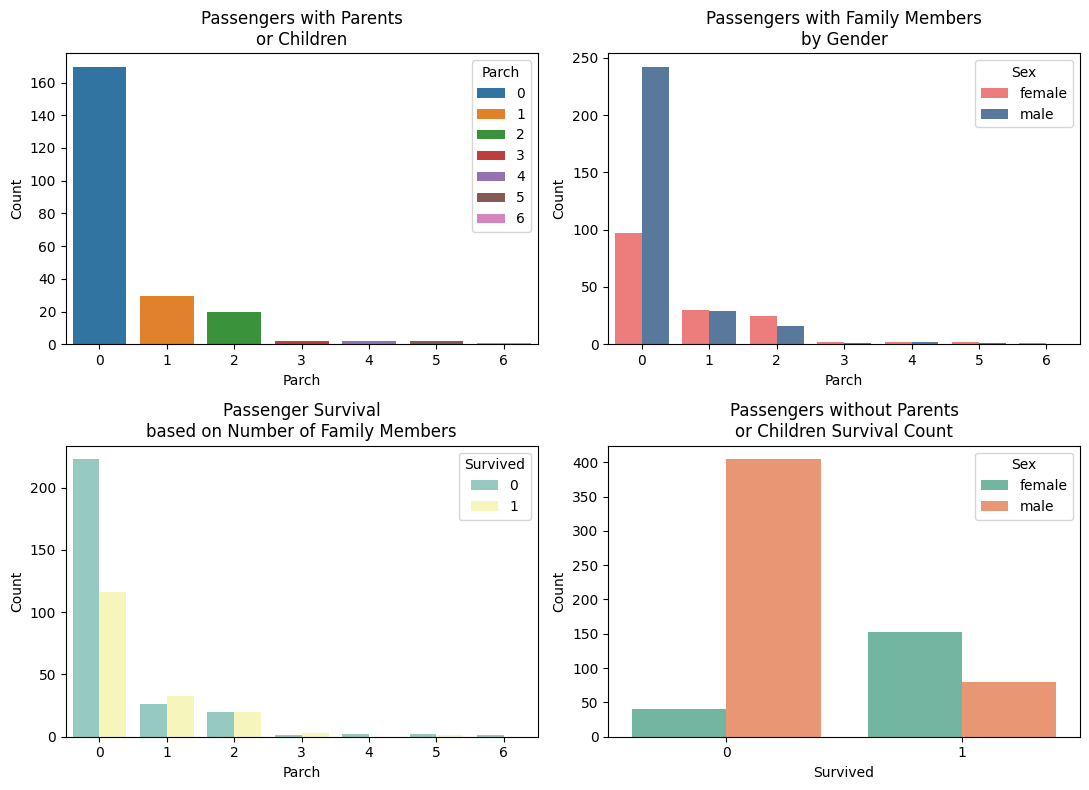

In [73]:
figure, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

sns.barplot(data=parch_survival, x='Parch', y='Total', ax=axes[0],hue='Parch', palette = "tab10", errorbar=None)
axes[0].set_title('Passengers with Parents\nor Children')
axes[0].set_ylabel("Count")


sns.barplot(data=parch_survival, x='Parch', y='Total', hue='Sex', ax=axes[1], palette=custom_palette, errorbar=None)
axes[1].set_title('Passengers with Family Members\nby Gender')
axes[1].set_ylabel("Count")

sns.barplot(data=parch_survival, x='Parch', y='Total', hue='Survived', ax=axes[2], palette = "Set3",errorbar=None)
axes[2].set_title('Passenger Survival\nbased on Number of Family Members')
axes[2].set_ylabel("Count")

sns.barplot(data=parch_0, x='Survived', y='Total', hue='Sex', palette="Set2", ax=axes[3])
axes[3].set_title('Passengers without Parents\nor Children Survival Count')
axes[3].set_ylabel("Count")

plt.tight_layout()
plt.show()

- The most interesting segment of passengers in terms of number of parents and children, is the one without any parents or children accompanying them.
- Most of the passengers were not accompanied by parents or children.
- Most of the passengers that were not accompanied by parents or children were male.
- Most these passengers did not survive.
- Most that did not survive, were men 60%.

##### SibSp

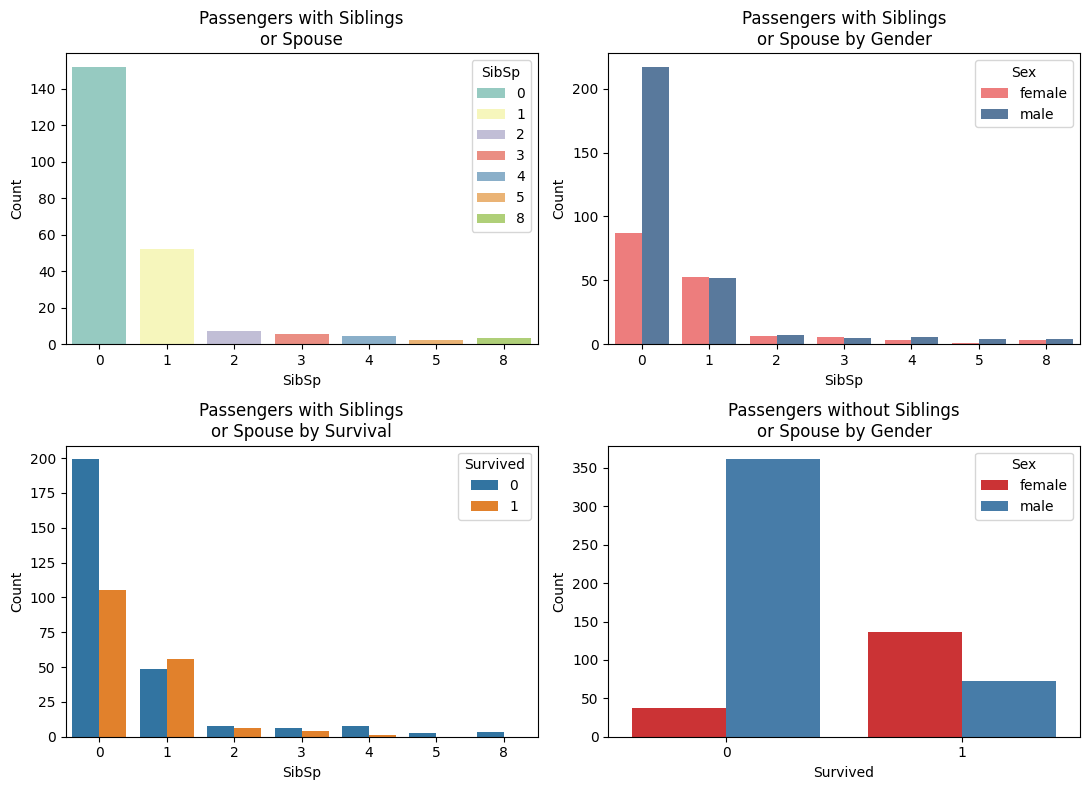

In [74]:
siblings_spouse =  train_df.groupby(['SibSp', 'Sex', 'Survived']).size().reset_index(name='Total')

figure, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', errorbar=None,hue="SibSp",palette="Set3", ax=axes[0])
axes[0].set_title('Passengers with Siblings\nor Spouse')
axes[0].set_ylabel("Count")

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', hue='Sex', errorbar=None, palette=custom_palette, ax=axes[1])
axes[1].set_title('Passengers with Siblings\nor Spouse by Gender')
axes[1].set_ylabel("Count")

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', hue='Survived', errorbar=None, ax=axes[2])
axes[2].set_title('Passengers with Siblings\nor Spouse by Survival')
axes[2].set_ylabel("Count")

single_without_siblings_passengers = siblings_spouse.loc[siblings_spouse['SibSp'] == 0]

sns.barplot(data=single_without_siblings_passengers, x='Survived', y='Total', hue='Sex', errorbar=None, palette="Set1", ax=axes[3])
axes[3].set_title('Passengers without Siblings\nor Spouse by Gender')
axes[3].set_ylabel("Count")

plt.tight_layout()
plt.show()

- Most of the passengers did not have a sibling or spouse onboard the Titanic
- As the number of siblings or spouses of a passenger increases, the percentage of survived passengers decreases

#### Data Preprocessing

In [75]:
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    train_df[col] = le.fit_transform(train_df[col])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


##### Feature, target selection

In [76]:
selected_features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Embarked']

X = train_df[selected_features]
y = train_df['Survived']

##### Test & Train Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

##### Scaling the features

In [80]:
Scaler = StandardScaler()

X_train  = Scaler.fit_transform(X_train)
X_test  = Scaler.transform(X_test)

##### Model Building

In [98]:
results = []

- LogisticRegression Classifier

In [ ]:
logReg_model = LogisticRegression()

logReg_model.fit(X_train, y_train)

training_accuracy = logReg_model.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

y_pred = logReg_model.predict(X_test)

print(classification_report(y_test, y_pred))

name = 'Logistic Regression'
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results.append([name, acc, prec, rec, f1])

The accuracy of model on training data is: 80.0%

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

[['Logistic Regression', 0.8071748878923767, 0.7738095238095238, 0.7303370786516854, 0.7514450867052023]]


In [82]:
scores = cross_val_score(logReg_model, X_train, y_train, cv = 10)

print('Using Cross Validation:')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Using Cross Validation:
0.80 accuracy with a standard deviation of 0.08


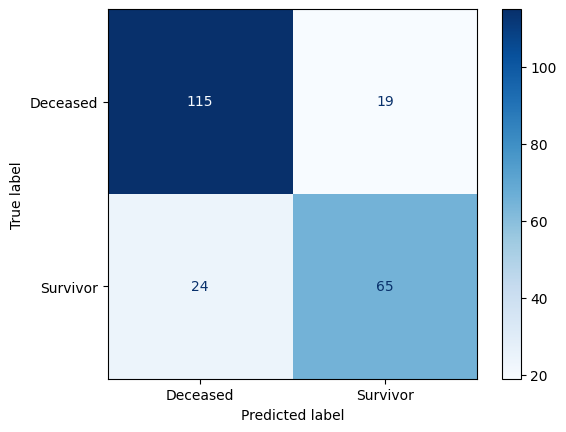

In [84]:
cm_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Deceased', 'Survivor'])
cm_display.plot(cmap="Blues")

plt.show()

- K-Nearest Neighbours Classifier

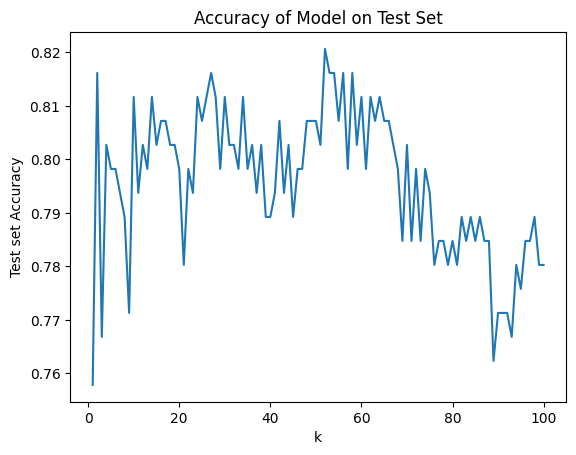

Best K for best accuracy is: 52


In [85]:
accuracies = []
k_list = list(range(1,101))

for k in range(1,101):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train, y_train)
    accuracies.append(KNNmodel.score(X_test, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
KNN_predictions = KNNmodel.predict(X_test)
training_accuracy = KNNmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

print(classification_report(y_test, KNN_predictions))

name = 'K-Nearest Neighbours'
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results.append([name, acc, prec, rec, f1])


The accuracy of model on training data is: 84.0%

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       134
           1       0.81      0.69      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

[['Logistic Regression', 0.8071748878923767, 0.7738095238095238, 0.7303370786516854, 0.7514450867052023], ['K-Nearest Neighbours', 0.8071748878923767, 0.7738095238095238, 0.7303370786516854, 0.7514450867052023]]


In [87]:
scores = cross_val_score(KNNmodel, X_train, y_train, cv = 10)

print('Using Cross Validation:')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Using Cross Validation:
0.82 accuracy with a standard deviation of 0.06


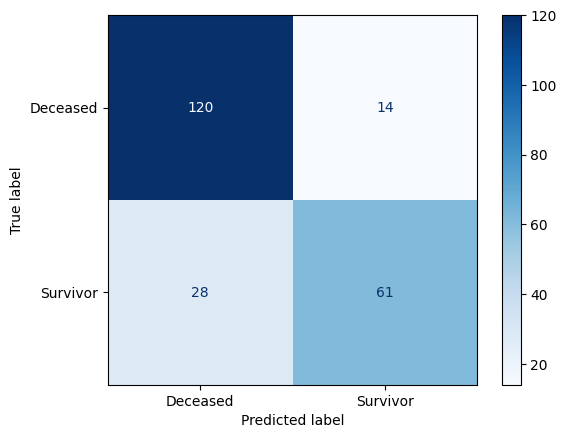

In [88]:
matrix = confusion_matrix(y_test, KNN_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Deceased', 'Survivor'])
cm_display.plot(cmap="Blues")

plt.show()

- Decision Tree Classifier

In [91]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 10)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6}
Best score is 0.8264360018091363


In [ ]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  12, min_samples_leaf = 5)

DTmodel.fit(X_train, y_train)

training_accuracy = DTmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

y_pred = DTmodel.predict(X_test)

print(classification_report(y_test, y_pred))

name = 'DecisionTree'
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results.append([name, acc, prec, rec, f1])

The accuracy of model on training data is: 88.0%

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       134
           1       0.84      0.73      0.78        89

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

[['Logistic Regression', 0.8071748878923767, 0.7738095238095238, 0.7303370786516854, 0.7514450867052023], ['K-Nearest Neighbours', 0.8071748878923767, 0.7738095238095238, 0.7303370786516854, 0.7514450867052023], ['DecisionTree', 0.8385650224215246, 0.8441558441558441, 0.7303370786516854, 0.7831325301204819]]


In [93]:
scores = cross_val_score(DTmodel, X_train, y_train, cv = 10)

print('Using Cross Validation:')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Using Cross Validation:
0.81 accuracy with a standard deviation of 0.04


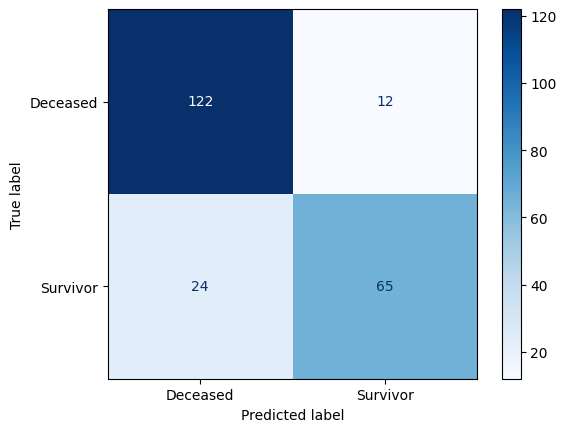

In [94]:
matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Deceased', 'Survivor'])
cm_display.plot(cmap="Blues")

plt.show()

##### Compare models

In [102]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.807175,0.773810,0.730337,0.751445
1,K-Nearest Neighbours,0.807175,0.773810,0.730337,0.751445
2,DecisionTree,0.838565,0.844156,0.730337,0.783133


- By looking at the table we can say that Decision Tree model outperforms other models in predicting whether passenger survived or not with 83% accuracy, 73% recall and 78% f1-score.